# Modifying the `Network` object
`GeNet` supports some simple modifications like adding, reindexing and removing nodes and links and some involved modifications like changing the data stored under nodes or links. All of these changes get recorded in `n.change_log`.

In [1]:
from genet import read_matsim
import os

path_to_matsim_network = '../example_data/pt2matsim_network'

network = os.path.join(path_to_matsim_network, 'network.xml')
schedule = os.path.join(path_to_matsim_network, 'schedule.xml')
vehicles = os.path.join(path_to_matsim_network, 'vehicles.xml')
n = read_matsim(
    path_to_network=network, 
    epsg='epsg:27700', 
    path_to_schedule=schedule, 
    path_to_vehicles=vehicles
)
# you don't need to read the vehicles file, but doing so ensures all vehicles
# in the schedule are of the expected type and the definition of the vehicle
# is preserved
n.print()

Graph info: Name: Network graph
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 
Schedule info: Schedule:
Number of services: 9
Number of routes: 68
Number of stops: 45


## Adding nodes/links

In [2]:
n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2021-03-31 11:57:07,790 - Added Link with index proposed_index, from node:4356572310 to node:5811263955, under multi-index:1, and data={'from': '4356572310', 'to': '5811263955', 'id': 'proposed_index'}


'proposed_index'

In [3]:
n.add_node(node='proposed_index', attribs={'data':'some_data'})

2021-03-31 11:57:07,813 - Added Node with index `proposed_index` and data={'data': 'some_data'}


'proposed_index'

The index passed is only a proposition. If a node or link under this link exists, a new, unique index will be generated.

In [4]:
actual_link_id_added = n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2021-03-31 11:57:07,825 - Generated 1 link ids.
2021-03-31 11:57:07,828 - Generated link id 0.
2021-03-31 11:57:07,830 - `proposed_index` already exists. Generated a new unique_index: `0`
2021-03-31 11:57:07,839 - Added Link with index 0, from node:4356572310 to node:5811263955, under multi-index:2, and data={'from': '4356572310', 'to': '5811263955', 'id': '0'}


## Reindexing

To reindex a node or link:

In [5]:
n.reindex_node('proposed_index', 'another_index')

2021-03-31 11:57:07,890 - Changed Link attributes for 0 links
2021-03-31 11:57:07,921 - Changed Link attributes for 0 links
2021-03-31 11:57:07,935 - Changed Node attributes under index: proposed_index
2021-03-31 11:57:07,984 - Changed Node index from proposed_index to another_index


In [6]:
n.reindex_link('proposed_index', 'another_index')

2021-03-31 11:57:08,006 - Changed Link attributes under index: proposed_index
2021-03-31 11:57:08,008 - Changed Link index from proposed_index to another_index


## Removing nodes/links

To remove a link or node:

In [7]:
n.remove_links(['another_index', actual_link_id_added])

2021-03-31 11:57:08,023 - Removed 2 links


In [8]:
n.remove_node('another_index')

2021-03-31 11:57:08,054 - Removed Node under index: another_index


## Modifying data stored on nodes or edges:

Let's say you have extracted `genet.Network` link ids of interest (See Section on Using Network - Accessing Data) and now you want to make changes to the network. Let's make changes to the nested OSM data stored on the links. We will replace the highway tags from `'primary'` to `'SOMETHING'`.

In [9]:
from genet import graph_operations

links = n.extract_links_on_edge_attributes(
    conditions= {'attributes': {'osm:way:highway': {'text': 'primary'}}},
)

links[:5]

['1007', '1008', '1023', '1024', '103']

In [10]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': {'car'},
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'primary'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}},
 'length': 13.941905154249884}

We create a dictionary which maps same changes to all links in the list using:

```python
    {link_id: {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}} for link_id in links}
```

In [11]:
n.apply_attributes_to_links({link_id: {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}} for link_id in links})

2021-03-31 11:57:08,474 - Changed Link attributes for 619 links


In [12]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': {'car'},
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'SOMETHING'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}},
 'length': 13.941905154249884}

In [13]:
n.change_log.head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-03-31 11:57:07,add,link,None,proposed_index,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
1,2021-03-31 11:57:07,add,node,None,proposed_index,None,{'data': 'some_data'},"[(add, , [('data', 'some_data')]), (add, id, p..."
2,2021-03-31 11:57:07,add,link,None,0,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
3,2021-03-31 11:57:07,modify,node,proposed_index,another_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')]), (change, ..."
4,2021-03-31 11:57:07,modify,node,proposed_index,proposed_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')])]"


In [14]:
n.change_log.loc[618, :]['old_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': {'car'}, 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'primary'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}, 'length': 90.65828423645875}"

In [15]:
n.change_log.loc[618, :]['new_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': {'car'}, 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'SOMETHING'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}, 'length': 90.65828423645875}"

In [16]:
n.change_log.loc[618, :]['diff']

[('change', 'attributes.osm:way:highway.text', ('primary', 'SOMETHING'))]

Another useful method is the `apply_function_to_links`/`nodes`. This function takes a user-defined function with the variable that is the data dictionary stored on the links or nodes respectively. This function does not support `conditions`, but this is something that can be encoded in you function, for example:

In [17]:
def divide_capacity(link_attributes):
    if 'car' in link_attributes['modes']:
        return link_attributes['capacity']/link_attributes['permlanes']
    
n.apply_function_to_links(divide_capacity, 'base_capacity')

2021-03-31 11:57:09,617 - Changed Link attributes for 3166 links


This method will apply results of this function to links for which a value can be computed. For use here, that means that for any link which has a `'car'` value in `'modes'` a value of capacity divided by the number of lanes will be computed. We specify that the results will be stored under `base_capacity` in the links attribute dictionary.

In [18]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': {'car'},
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'SOMETHING'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}},
 'length': 13.941905154249884,
 'base_capacity': 1500.0}

# Modifying the `Schedule` object

GeNet has a number of methods to change the Schedule objects. Make sure you validate the end result.

In [19]:
from genet import Stop, Route, Service

## Adding Routes, Services

You can add `Route`s and `Service`s. To add a `Route`, you need to identify which existing `Service` it should come under.

In [20]:
route = Route(
    route_short_name='N55',
    mode='bus',
    trips={'trip_id': ['fun_trip_1', 'fun_trip_2'], 
           'trip_departure_time': ['03:53:00', '16:23:00'], 
           'vehicle_id': ['fun_bus_1', 'fun_bus_2']},
   arrival_offsets=['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
   departure_offsets=['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
   id='new_route',
#    route= ['834', '1573', '3139', '3141', '574', '3154', '979', '980', '981'],
   await_departure= [True, True, True, True],
   stops=[n.schedule.stop('490000235X.link:834'),
          Stop(id='new_stop', x=529500, y=181300,
            name='New Stop', epsg='epsg:27700'),
          Stop(id='other_new_stop', x=529502, y=181302,
            name='Other New Stop', epsg='epsg:27700'),
          n.schedule.stop('490010689KB.link:981')]
)

n.schedule.add_route('20274', route)

2021-03-31 11:57:10,205 - Added Route with index `new_route`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['fun_trip_1', 'fun_trip_2'], 'trip_departure_time': ['03:53:00', '16:23:00'], 'vehicle_id': ['fun_bus_1', 'fun_bus_2']}, 'arrival_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'route_long_name': '', 'id': 'new_route', 'route': [], 'await_departure': [True, True, True, True], 'ordered_stops': ['490000235X.link:834', 'new_stop', 'other_new_stop', '490010689KB.link:981']} to Service `20274` within the Schedule


<Route instance at 4731681928: with 4 stops and 2 trips>

Alternatively, you can create and add a new `Service`.

In [21]:
n.schedule.add_service(Service(id='new_service', routes=[route]))

2021-03-31 11:57:10,242 - Route with ID `new_route` within this Service `new_service` already exists in the Schedule. This Route will be reindexed to `new_service_new_route`
2021-03-31 11:57:10,254 - Reindexed Route from new_route to new_service_new_route
2021-03-31 11:57:10,278 - Added Service with index `new_service`, data={'id': 'new_service', 'name': 'N55'} and Routes: ['new_service_new_route']


<Service instance at 4731545864: with 1 routes>

You can also refer to existing stops in the `Schedule` when creating a`Route` to be added. You can either just pass Stop IDs as strings or use a stop method on the schedule to take and use that stop object. Note that in the case of the former (passing ID strings), the route will not have the spatial information for those stops until it is added to the Schedule.

In [22]:
r = Route(
    route_short_name='N55',
    mode='bus',
    trips={'trip_id': ['some_trip_1'], 
           'trip_departure_time': ['16:23:00'], 
           'vehicle_id': ['some_bus_2']},
   arrival_offsets=['00:00:00', '00:06:00'],
   departure_offsets=['00:00:00', '00:06:00'],
   id='another_new_route',
#    route= ['834', '1573', '3139', '3141', '574', '3154', '979', '980', '981'],
   await_departure= [True, True],
   stops=['490000235X.link:834', 
          '490010689KB.link:981']
)

In [23]:
r.graph().nodes['490000235X.link:834']

{'routes': ['another_new_route']}

In [24]:
n.schedule.add_route('20274', r)

2021-03-31 11:57:10,334 - Added Route with index `another_new_route`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['some_trip_1'], 'trip_departure_time': ['16:23:00'], 'vehicle_id': ['some_bus_2']}, 'arrival_offsets': ['00:00:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:06:00'], 'route_long_name': '', 'id': 'another_new_route', 'route': [], 'await_departure': [True, True], 'ordered_stops': ['490000235X.link:834', '490010689KB.link:981']} to Service `20274` within the Schedule


<Route instance at 4731497216: with 2 stops and 1 trips>

In [25]:
r.graph().nodes['490000235X.link:834']

{'services': ['18853', '14134', '20274'],
 'routes': ['another_new_route',
  'VJf9a22035ae6f25bb420df833474943ad76065c89',
  'VJd78967364a302cf232c5139d40622dcb6c238c9e',
  'VJf3e316e5e605bb512147dee2a989be5a82ef1b5f',
  'VJ375a660d47a2aa570aa20a8568012da8497ffecf',
  'VJ256e98df611ff48afe737ddc81cbcde82e4e81c8',
  'VJ4e2b897edf0e7b8a8e3b5516ab43ce56f72c5cff',
  'new_route',
  'VJdf3936da1a51eb33db594ef99738802c14b19995',
  'VJ2aba67e3ed98f2ed5f5966c1ac394cbf6d1943d7',
  'VJa7f37392e276aeac26c7e73bbc05e6a71af38dba',
  'VJ12ba6089dfb2733e29c415a1a0015fef30fd5305'],
 'id': '490000235X.link:834',
 'x': 529981.7958802709,
 'y': 181412.0975758662,
 'epsg': 'epsg:27700',
 'name': 'Tottenham Court Road Station (Stop X)',
 'lon': 51.51668503324075,
 'lat': -0.12809598708996447,
 's2_id': 2507584377443783851,
 'additional_attributes': {'isBlocking', 'linkRefId', 'name'},
 'linkRefId': '834',
 'isBlocking': 'false'}

In [26]:
r = Route(
    route_short_name='N55',
    mode='bus',
    trips={'trip_id': ['some_trip_1'], 
           'trip_departure_time': ['16:23:00'], 
           'vehicle_id': ['some_bus_2']},
   arrival_offsets=['00:00:00', '00:06:00'],
   departure_offsets=['00:00:00', '00:06:00'],
   id='another_new_route_2',
#    route= ['834', '1573', '3139', '3141', '574', '3154', '979', '980', '981'],
   await_departure= [True, True],
   stops=[n.schedule.stop('490000235X.link:834'), 
          n.schedule.stop('490010689KB.link:981')]
)
n.schedule.add_route('20274', r)

2021-03-31 11:57:10,385 - Added Route with index `another_new_route_2`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['some_trip_1'], 'trip_departure_time': ['16:23:00'], 'vehicle_id': ['some_bus_2']}, 'arrival_offsets': ['00:00:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:06:00'], 'route_long_name': '', 'id': 'another_new_route_2', 'route': [], 'await_departure': [True, True], 'ordered_stops': ['490000235X.link:834', '490010689KB.link:981']} to Service `20274` within the Schedule


<Route instance at 4731497104: with 2 stops and 1 trips>

Note that for a Schedule to be a valid MATSim network, each stop referred to by a route needs a `linkRefId` attribute which links the stop to the `Network`.

Trying to add Stops with IDs already in the Schedule will result in an error, unless the `force=True` is set. The added route/service will inherit the data stored under those stops. The idea is that you can either specify the Stops in the route/service to be added correctly, or if they are to be changed, you use a dedicated method - check section 'Modifying data' below.

In [27]:
route = Route(
    route_short_name='N55',
    mode='bus',
    trips={'trip_id': ['fun_trip_1', 'fun_trip_2'], 
           'trip_departure_time': ['03:53:00', '16:23:00'], 
           'vehicle_id': ['fun_bus_1', 'fun_bus_2']},
   arrival_offsets=['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
   departure_offsets=['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
   id='another_new_route_3',
#    route= ['834', '1573', '3139', '3141', '574', '3154', '979', '980', '981'],
   await_departure= [True, True, True, True],
   stops=[
       Stop(id='490000235X.link:834', x=529981, y=181412, epsg='epsg:27700'),
       Stop(id='new_stop', x=529500, y=181300, epsg='epsg:27700', name='New Stop'),
       Stop(id='other_new_stop', x=529502, y=181302, epsg='epsg:27700', name='Other New Stop'),
       Stop(id='490010689KB.link:981', x=529166, y=181256, epsg='epsg:27700')
   ]
)

n.schedule.add_route('20274', route, force=True)

2021-03-31 11:57:11,446 - The following stops will inherit the data currently stored under those Stop IDs in the Schedule: ['490000235X.link:834', '490010689KB.link:981'].
2021-03-31 11:57:11,454 - Added Route with index `another_new_route_3`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['fun_trip_1', 'fun_trip_2'], 'trip_departure_time': ['03:53:00', '16:23:00'], 'vehicle_id': ['fun_bus_1', 'fun_bus_2']}, 'arrival_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'route_long_name': '', 'id': 'another_new_route_3', 'route': [], 'await_departure': [True, True, True, True], 'ordered_stops': ['490000235X.link:834', 'new_stop', 'other_new_stop', '490010689KB.link:981']} to Service `20274` within the Schedule


<Route instance at 4731477016: with 4 stops and 2 trips>

Note the message above: `The following stops will inherit the data currently stored under those Stop IDs in the Schedule: ['490000235X.link:834', '490010689KB.link:981'].`

NOTE: adding routes and services results in new vehicles (unless you reuse the ones already in the Schedule---beware that the same vehicle cannot service multiple trips at the same time, genet does not currently have checks for this, the user needs to be mindful of the physics of shared vehicles). New vehicles need definitions, you can add them yourself to `schedule.vehicles['vehicle_id'] = {'type': 'bus'}` ensuring this vehicle type is defined in `schedule.vehicle_types['bus']`, or you can use a genet method to generate those vehicles, the type will be derived from the mode of the route. Then you can check if all of the types that vehicles are referring to have definitions.

In [28]:
len(n.schedule.vehicles)

13290

In [29]:
n.schedule.generate_vehicles()
n.schedule.validate_vehicle_definitions()

/Users/kasia.kozlowska/PycharmProjects/ABM/genet/genet/schedule_elements.py:1186: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.vehicles = {**df.T.to_dict(), **self.vehicles}
2021-03-31 11:57:11,900 - The following vehicle types are missing from the `vehicle_types` attribute: {'bus'}
2021-03-31 11:57:11,904 - Vehicles affected by missing vehicle types: {'fun_bus_1': {'type': 'bus'}, 'fun_bus_2': {'type': 'bus'}, 'some_bus_2': {'type': 'bus'}}


False

In [30]:
len(n.schedule.vehicles)

13293

In [31]:
n.schedule.change_log().head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-03-31 11:57:10,add,route,None,new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
1,2021-03-31 11:57:10,add,service,None,new_service,None,"{'id': 'new_service', 'name': 'N55'}","[(add, , [('id', 'new_service'), ('name', 'N55..."
2,2021-03-31 11:57:10,add,route,None,another_new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
3,2021-03-31 11:57:10,add,route,None,another_new_route_2,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
4,2021-03-31 11:57:11,add,route,None,another_new_route_3,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."


There are no methods to add `Stop` objects on their own. They are added to the Schedule with `Route` and `Service` objects.

## Reindexing

In [32]:
n.schedule['new_service'].reindex(new_id='more_appropriate_id')

2021-03-31 11:57:11,971 - Reindexed Service from new_service to more_appropriate_id


In [33]:
n.schedule.route('new_route').reindex(new_id='more_appropriate_route_id')

2021-03-31 11:57:11,997 - Reindexed Route from new_route to more_appropriate_route_id


In [34]:
n.schedule.change_log().head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-03-31 11:57:10,add,route,None,new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
1,2021-03-31 11:57:10,add,service,None,new_service,None,"{'id': 'new_service', 'name': 'N55'}","[(add, , [('id', 'new_service'), ('name', 'N55..."
2,2021-03-31 11:57:10,add,route,None,another_new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
3,2021-03-31 11:57:10,add,route,None,another_new_route_2,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
4,2021-03-31 11:57:11,add,route,None,another_new_route_3,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."


## Removing Stops, Routes, Services

In [35]:
n.schedule.remove_service('more_appropriate_id')

2021-03-31 11:57:12,051 - Removed Service with index `more_appropriate_id`, data={'id': 'more_appropriate_id', 'name': 'N55'} and Routes: {'new_service_new_route'}


In [36]:
n.schedule.remove_route('more_appropriate_route_id')

2021-03-31 11:57:12,069 - Removed Route with index `more_appropriate_route_id`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['fun_trip_1', 'fun_trip_2'], 'trip_departure_time': ['03:53:00', '16:23:00'], 'vehicle_id': ['fun_bus_1', 'fun_bus_2']}, 'arrival_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'route_long_name': '', 'id': 'more_appropriate_route_id', 'route': [], 'await_departure': [True, True, True, True], 'ordered_stops': ['490000235X.link:834', 'new_stop', 'other_new_stop', '490010689KB.link:981']}. It was linked to Service `20274`.


In [37]:
for route_id in {'another_new_route', 'another_new_route_2', 'another_new_route_3'}:
    n.schedule.remove_route(route_id)

2021-03-31 11:57:12,091 - Removed Route with index `another_new_route`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['some_trip_1'], 'trip_departure_time': ['16:23:00'], 'vehicle_id': ['some_bus_2']}, 'arrival_offsets': ['00:00:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:06:00'], 'route_long_name': '', 'id': 'another_new_route', 'route': [], 'await_departure': [True, True], 'ordered_stops': ['490000235X.link:834', '490010689KB.link:981']}. It was linked to Service `20274`.
2021-03-31 11:57:12,095 - Removed Route with index `another_new_route_2`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'trip_id': ['some_trip_1'], 'trip_departure_time': ['16:23:00'], 'vehicle_id': ['some_bus_2']}, 'arrival_offsets': ['00:00:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:06:00'], 'route_long_name': '', 'id': 'another_new_route_2', 'route': [], 'await_departure': [True, True], 'ordered_stops': ['490000235X.link:834', '490010689KB.link:981']}. 

In [38]:
n.schedule.change_log().tail()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
7,2021-03-31 11:57:12,remove,service,more_appropriate_id,None,"{'id': 'more_appropriate_id', 'name': 'N55'}",None,"[(remove, , [('id', 'more_appropriate_id'), ('..."
8,2021-03-31 11:57:12,remove,route,more_appropriate_route_id,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...",None,"[(remove, , [('route_short_name', 'N55'), ('mo..."
9,2021-03-31 11:57:12,remove,route,another_new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...",None,"[(remove, , [('route_short_name', 'N55'), ('mo..."
10,2021-03-31 11:57:12,remove,route,another_new_route_2,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...",None,"[(remove, , [('route_short_name', 'N55'), ('mo..."
11,2021-03-31 11:57:12,remove,route,another_new_route_3,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...",None,"[(remove, , [('route_short_name', 'N55'), ('mo..."


You can also remove `Stop`s. This will disconnect `Route`s and `Service`s using that `Stop`s and likely render them invalid. The method will warn you which `Route`s and `Servce`s are affected.

In [39]:
n.schedule.remove_stop('new_stop')

2021-03-31 11:57:12,160 - Removed Stop with index `new_stop`, data={'id': 'new_stop', 'x': 529500.0, 'y': 181300.0, 'epsg': 'epsg:27700', 'name': 'New Stop', 'lon': -0.1350768098744082, 'lat': 51.51578819710296, 's2_id': 5221390696585158415, 'additional_attributes': set()}. Routes affected: []. Services affected: [].


Likewise, removing `Route`s and `Service`s is likely to result in a number of unused stops. There is a method to remove such stops.

In [40]:
n.schedule.remove_unsused_stops()

2021-03-31 11:57:12,180 - Removed Stop with index `other_new_stop`, data={'id': 'other_new_stop', 'x': 529502.0, 'y': 181302.0, 'epsg': 'epsg:27700', 'name': 'Other New Stop', 'lon': -0.1350472687576662, 'lat': 51.515805712413496, 's2_id': 5221390696583632715, 'additional_attributes': set()}. Routes affected: []. Services affected: [].
2021-03-31 11:57:12,181 - Removed Stops with indecies `['other_new_stop']` which were not used by any Routes.


## Modifying data stored for Stops, Routes, Services

### Applying known or pre-computed changes
Applying changes or new attributes to Services, Routes and Stops can be done via Schedule level methods. They all work with a dictionary where the keys are the object IDs and the values are dictionaries holding attribute names and values. The method to extract a DataFrame on attributes comes in handy here. E.g.

In [41]:
df = n.schedule.service_attribute_data(keys='name')
df.head()

,name
18915,N5
14134,98
17732,N20
18853,N8
15660,113


DataFrames are easy to work with. Youcould for exmaple manipulate the names or use other data to change these. For demonstration here, let's just set the names to something easy.

In [42]:
df['name'] = df['name'].apply(lambda x: f'Service_{x}')
df.head()

,name
18915,Service_N5
14134,Service_98
17732,Service_N20
18853,Service_N8
15660,Service_113


You can then convert this to a dictionary and pass it to the `apply_attributes_to_services` method.

In [43]:
n.schedule.apply_attributes_to_services(df.T.to_dict())

2021-03-31 11:57:12,250 - Changed Service attributes for 9 services


In [44]:
n.schedule.change_log().tail()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
18,2021-03-31 11:57:12,modify,service,15660,15660,"{'id': '15660', 'name': '113'}","{'id': '15660', 'name': 'Service_113'}","[(change, name, (113, Service_113))]"
19,2021-03-31 11:57:12,modify,service,12430,12430,"{'id': '12430', 'name': '205'}","{'id': '12430', 'name': 'Service_205'}","[(change, name, (205, Service_205))]"
20,2021-03-31 11:57:12,modify,service,14073,14073,"{'id': '14073', 'name': '94'}","{'id': '14073', 'name': 'Service_94'}","[(change, name, (94, Service_94))]"
21,2021-03-31 11:57:12,modify,service,15234,15234,"{'id': '15234', 'name': '134'}","{'id': '15234', 'name': 'Service_134'}","[(change, name, (134, Service_134))]"
22,2021-03-31 11:57:12,modify,service,20274,20274,"{'id': '20274', 'name': 'N55'}","{'id': '20274', 'name': 'Service_N55'}","[(change, name, (N55, Service_N55))]"


You can do the same for `Routes` and `Stops`. Your dictionaries cannot however hold changes to indices. You will encounter an error and should use `reindex` methods for such operations.

In [45]:
n.schedule.apply_attributes_to_routes(
    {'VJ375a660d47a2aa570aa20a8568012da8497ffecf': {
        'name': 'my_favourite_route', 
        'mode': 'piggyback'
    }}
)

2021-03-31 11:57:12,307 - Changed Route attributes for 1 routes


In [46]:
n.schedule.apply_attributes_to_stops(
    {'490000235YB.link:574': {'new_attribute': 'hello!'}}
)

2021-03-31 11:57:12,323 - Changed Stop attributes for 1 stops


In [47]:
n.schedule.change_log().tail()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
20,2021-03-31 11:57:12,modify,service,14073,14073,"{'id': '14073', 'name': '94'}","{'id': '14073', 'name': 'Service_94'}","[(change, name, (94, Service_94))]"
21,2021-03-31 11:57:12,modify,service,15234,15234,"{'id': '15234', 'name': '134'}","{'id': '15234', 'name': 'Service_134'}","[(change, name, (134, Service_134))]"
22,2021-03-31 11:57:12,modify,service,20274,20274,"{'id': '20274', 'name': 'N55'}","{'id': '20274', 'name': 'Service_N55'}","[(change, name, (N55, Service_N55))]"
23,2021-03-31 11:57:12,modify,route,VJ375a660d47a2aa570aa20a8568012da8497ffecf,VJ375a660d47a2aa570aa20a8568012da8497ffecf,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","{'route_short_name': 'N55', 'mode': 'piggyback...","[(change, mode, (bus, piggyback)), (add, , [('..."
24,2021-03-31 11:57:12,modify,stop,490000235YB.link:574,490000235YB.link:574,"{'services': ['18853', '14134', '20274'], 'rou...","{'services': ['18853', '14134', '20274'], 'rou...","[(add, , [('new_attribute', 'hello!')])]"


You can use `route_trips_to_dataframe` to extract all of the trips, their departures and vehicle IDs associated with the trips in the schedule. Trip ids need not be unique, route IDs provide a secondary index. Associated service IDs are also given for convenience.

In [48]:
trips = n.schedule.route_trips_to_dataframe(gtfs_day='20210101')

In [49]:
trips.head()

,service_id,route_id,trip_id,trip_departure_time,vehicle_id
0,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,VJ8375f7a9e68d59d39ae5113ce44ef920c56adb79_20:...,2021-01-01 20:50:08,veh_443_bus
1,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,VJf8c1b44c2d6396d5223bdc5d1ec70c9a17daafc1_21:...,2021-01-01 21:32:08,veh_452_bus
2,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,VJ5613941368b37ea4be1853f94b1a993f6a56dad7_22:...,2021-01-01 21:10:08,veh_439_bus
3,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,VJ53d627cc50ee4d371871f32182de9ba5247ec443_06:...,2021-01-01 06:35:08,veh_437_bus
4,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,VJc81124c0faec85bb098d18f9fb8005b15e83f999_05:...,2021-01-01 06:46:08,veh_442_bus


Let's change all of the trip ids to something shorter

In [50]:
trips['trip_id'] = 'trip_' + trips.index.to_series().astype(str)
trips.head()

,service_id,route_id,trip_id,trip_departure_time,vehicle_id
0,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,trip_0,2021-01-01 20:50:08,veh_443_bus
1,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,trip_1,2021-01-01 21:32:08,veh_452_bus
2,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,trip_2,2021-01-01 21:10:08,veh_439_bus
3,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,trip_3,2021-01-01 06:35:08,veh_437_bus
4,12430,VJeae6e634f8479e0b6712780d5728f0afca964e64,trip_4,2021-01-01 06:46:08,veh_442_bus


You can `set_route_trips_dataframe` which takes this dataframe and applies changes to all route trips based on the data in the dataframe. This means you can generate this DataFrame as shown below, manipulate trips (delete them, add new ones), change their departure times or change their vehicle ids to be shared for differnt trips, perhaps on some temporal logic and as long as the dataframe has the same schema, you can use it to set new trips in the schedule. This will appear in the changelog as a route level modify event.

Nb removing all trips of the same route from the dataframe will have no effect when being applied. If there is data in the dataframe for a route, all of its trips will be replaced by the data in the dataframe, and if there is no data for a route in the frame, no changes will be applied to that route (i.e. the trips attribute for routes missing from the dataframe will not be set as empty).

In [51]:
n.schedule.set_route_trips_dataframe(trips)
n.schedule.route_attribute_data(keys=[{'trips': 'trip_id'}])

2021-03-31 11:57:12,642 - Changed Route attributes for 68 routes


,trips::trip_id
VJeae6e634f8479e0b6712780d5728f0afca964e64,"[trip_0, trip_1, trip_2, trip_3, trip_4, trip_..."
VJfc4917783c2ca3227789fa7c532c9adf47702095,"[trip_22, trip_23, trip_24, trip_25, trip_26, ..."
VJ24fe211d801738b556a39f815256d7f6bc544ec5,"[trip_31, trip_32, trip_33, trip_34, trip_35, ..."
VJ256e98df611ff48afe737ddc81cbcde82e4e81c8,[trip_65]
VJaa5ee0daec7529d7668c81fe7fac0c4ff545daea,"[trip_66, trip_67, trip_68, trip_69, trip_70, ..."
...,...
VJf8e38a73359b6cf743d8e35ee64ef1f7b7914daa,"[trip_1514, trip_1515, trip_1516, trip_1517, t..."
VJbf9d4fdb976223e6a026c0c669ed290418abefee,"[trip_1526, trip_1527, trip_1528, trip_1529, t..."
VJd9dbeefeca6d74ef2594a17514ebc08ee2d503b2,"[trip_1532, trip_1533, trip_1534, trip_1535, t..."
VJb08f8a2de01a4ef99d3b7fefd9022117ac307531,"[trip_1547, trip_1548, trip_1549, trip_1550]"


### Applying changes using functions or mappings

If you have some logic that can be written into a function of object's attributes, you can pass this to `apply_function_to_x` methods. You need to select `location`, which refers to the name of the attribute the result should be stored under. It can already exist and be overwritten. The function passed, is not expected to work with all objects. It will fail silently, only evaluating and generating outputs where possible.

In [52]:
from shapely.geometry import Point

def add_shapely_geometry_points(stop_attribs):
    return Point(stop_attribs['x'], stop_attribs['y'])

n.schedule.apply_function_to_stops(add_shapely_geometry_points, location='geometry')

2021-03-31 11:57:12,686 - Changed Stop attributes for 45 stops


In [53]:
n.schedule.change_log().tail(2)

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
136,2021-03-31 11:57:12,modify,stop,490000091G.link:1242,490000091G.link:1242,"{'services': ['12430'], 'routes': ['VJ15419796...","{'services': ['12430'], 'routes': ['VJ15419796...","[(add, , [('geometry', <shapely.geometry.point..."
137,2021-03-31 11:57:12,modify,stop,490010531W.link:1867,490010531W.link:1867,"{'services': ['14073'], 'routes': ['VJdbc28007...","{'services': ['14073'], 'routes': ['VJdbc28007...","[(add, , [('geometry', <shapely.geometry.point..."


In [54]:
n.schedule.stop_attribute_data(keys=['name', 'x', 'y', 'geometry']).head()

,name,x,y,geometry
490000235X.link:834,Tottenham Court Road Station (Stop X),529981.795880,181412.097576,POINT (529981.7958802709 181412.0975758662)
490000235YB.link:574,Oxford Street Soho Street (Stop YB),529570.781323,181336.281593,POINT (529570.7813227688 181336.2815925331)
490014214HE.link:3154,Wardour Street (Stop OM),529477.750156,181314.437043,POINT (529477.7501560802 181314.4370430721)
490010689KB.link:981,Great Titchfield Street Oxford Circus Station...,529166.734973,181256.336723,POINT (529166.7349732723 181256.3367228433)
490000235P.link:15,Tottenham Court Road Station New Oxford Stree...,529967.770031,181420.307095,POINT (529967.770031479 181420.3070953883)


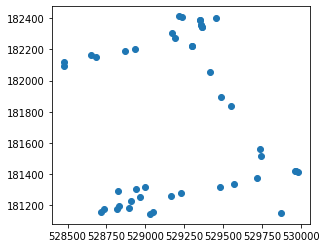

In [55]:
from geopandas import GeoDataFrame
GeoDataFrame(n.schedule.stop_attribute_data(keys='geometry')).plot()

In [56]:
n.schedule.stop('490000235YB.link:574').__dict__

{'id': '490000235YB.link:574',
 'x': 529570.7813227688,
 'y': 181336.2815925331,
 'epsg': 'epsg:27700',
 'name': 'Oxford Street  Soho Street (Stop YB)',
 'lat': -0.13404398709291862,
 'lon': 51.51609803324078,
 's2_id': 2507584474601580133,
 'additional_attributes': {'geometry',
  'isBlocking',
  'linkRefId',
  'new_attribute'},
 'linkRefId': '574',
 'isBlocking': 'false',
 'new_attribute': 'hello!',
 'geometry': <shapely.geometry.point.Point at 0x11a0447b8>}

For this let's say we want to reduce the number of trips. For simplicity of demonstration we don't have about which trips we delete, but logic around timings of trips can be added in this function, as the trips are saved as one of routes attributes (check out the summary methods)

In [57]:
# before
len(n.schedule.route_trips_to_dataframe())

1562

In [58]:
def reduce_trips(attribs):
    # just delete any other trip
    attribs['trips']['trip_id'] = attribs['trips']['trip_id'][::2]
    attribs['trips']['trip_departure_time'] = attribs['trips']['trip_departure_time'][::2]
    attribs['trips']['vehicle_id'] = attribs['trips']['vehicle_id'][::2]
    return attribs['trips']

n.schedule.apply_function_to_routes(reduce_trips, 'trips')

2021-03-31 11:57:13,246 - Changed Route attributes for 68 routes


In [59]:
# after
len(n.schedule.route_trips_to_dataframe())

792

Note, this could also be done using the `route_trips_to_dataframe` and `set_route_trips_dataframe` mentioned above.

Let's give an example of using a mapping. We can re-use the service name DataFrame we generated above.

In [60]:
df['new_name'] = 'Brand_new_name' + df['name']
df.head()

,name,new_name
18915,Service_N5,Brand_new_nameService_N5
14134,Service_98,Brand_new_nameService_98
17732,Service_N20,Brand_new_nameService_N20
18853,Service_N8,Brand_new_nameService_N8
15660,Service_113,Brand_new_nameService_113


In [61]:
name_map = dict(zip(df['name'], df['new_name']))
name_map

{'Service_N5': 'Brand_new_nameService_N5',
 'Service_98': 'Brand_new_nameService_98',
 'Service_N20': 'Brand_new_nameService_N20',
 'Service_N8': 'Brand_new_nameService_N8',
 'Service_113': 'Brand_new_nameService_113',
 'Service_205': 'Brand_new_nameService_205',
 'Service_94': 'Brand_new_nameService_94',
 'Service_134': 'Brand_new_nameService_134',
 'Service_N55': 'Brand_new_nameService_N55'}

In this case, `location` refers to the attribute to be mapped.

In [62]:
n.schedule.apply_function_to_services(name_map, location='name')

2021-03-31 11:57:13,348 - Changed Service attributes for 9 services


In [63]:
n.schedule.change_log().tail()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
210,2021-03-31 11:57:13,modify,service,15660,15660,"{'id': '15660', 'name': 'Service_113'}","{'id': '15660', 'name': 'Brand_new_nameService...","[(change, name, (Service_113, Brand_new_nameSe..."
211,2021-03-31 11:57:13,modify,service,12430,12430,"{'id': '12430', 'name': 'Service_205'}","{'id': '12430', 'name': 'Brand_new_nameService...","[(change, name, (Service_205, Brand_new_nameSe..."
212,2021-03-31 11:57:13,modify,service,14073,14073,"{'id': '14073', 'name': 'Service_94'}","{'id': '14073', 'name': 'Brand_new_nameService...","[(change, name, (Service_94, Brand_new_nameSer..."
213,2021-03-31 11:57:13,modify,service,15234,15234,"{'id': '15234', 'name': 'Service_134'}","{'id': '15234', 'name': 'Brand_new_nameService...","[(change, name, (Service_134, Brand_new_nameSe..."
214,2021-03-31 11:57:13,modify,service,20274,20274,"{'id': '20274', 'name': 'Service_N55'}","{'id': '20274', 'name': 'Brand_new_nameService...","[(change, name, (Service_N55, Brand_new_nameSe..."
